
Example: Exercise 2 (Problem 2.1)

Visualization of Minimum Bayesian Risk criterion.
Assuming Gaussian bivariate distribution and 01-loss.
(Lukas Mauch 2016)



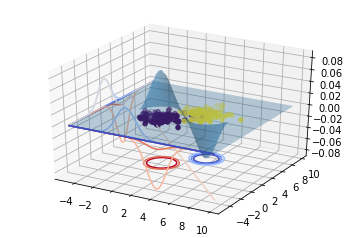

In [13]:
# -*- coding: utf-8 -*-
"""
================================
Example: Exercise 2 (Problem 2.1)
================================

Visualization of Minimum Bayesian Risk criterion.
Assuming Gaussian bivariate distribution and 01-loss.
(Lukas Mauch 2016)
"""
print(__doc__)

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

from matplotlib import cm
import numpy as np

#--------------------------------------------------------------------------------
#Create a 1D toy dataset containing two classes and only one feature with Gaussian
#distribution.
#--------------------------------------------------------------------------------

#define the class priors 
#(you can play around with the prior and have a look at its influence)
prior1 = 0.5
prior2 = 1-prior1

#you can modify the variances to see how it influences the decision boundary
var1 = 1  
var2 = 1

#draw the samples from class one and two
X1 = np.random.randn(100,2)*np.sqrt(var1) + np.asarray((1,1))   #class 1
X2 = np.random.randn(100,2)*np.sqrt(var2) + np.asarray((4,4))   #class 1
X  = np.concatenate([X1,X2], axis = 0)

#define the class conditional density functions
def P1(x,y):
    p = 1/(2*np.pi*var1)*np.exp(-0.5/(var1**2)*((x-1)**2+(y-1)**2))
    return p
    
def P2(x,y):
    p = 1/(2*np.pi*var2)*np.exp(-0.5/(var2**2)*((x-4)**2+(y-4)**2))
    return p
    
#Create the class labels.
Y = np.ravel(np.concatenate([np.zeros((100,1)),np.ones((100,1))], axis = 0)) 

#--------------------------------------------------------------------------------
#Define the discriminant function
#--------------------------------------------------------------------------------
def discr(x,y):
    return P1(x,y)*prior1 - P2(x,y)*prior2
    
#--------------------------------------------------------------------------------
#Plot everything (visualize clusters, discriminant function and its contours)
#--------------------------------------------------------------------------------
xx, yy = np.meshgrid(np.arange(-5, 10, 0.2), np.arange(-5, 10, 0.2))
zz = discr(xx,yy)

fig = plt.figure()
ax = fig.gca(projection='3d')

levels = [-0.04, -0.03, -0.02, 0, 0.02, 0.03]

ax.scatter(X[:,0],X[:,1], c=np.ravel(Y))
ax.plot_surface(xx, yy, zz, rstride=2, cstride=2, alpha=0.3)
cset = ax.contour(xx, yy, zz, levels, zdir='z', offset=np.min(zz), cmap=cm.coolwarm)
cset = ax.contour(xx, yy, zz, zdir='x', offset=-5, cmap=cm.coolwarm)
cset = ax.contour(xx, yy, zz, zdir='y', offset=-5, cmap=cm.coolwarm)
plt.show()